# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [ ]:
from __future__ import absolute_import, division, print_function

In [ ]:
import tensorflow as tf
import numpy as np
rng = np.random

In [38]:
# Parameters.
learning_rate = 0.01
training_steps = 10
display_step = 50

In [20]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
X.shape

(17,)

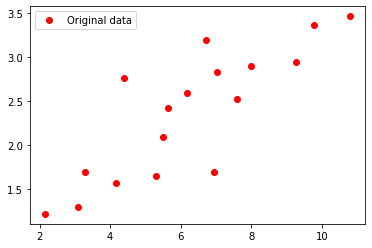

In [21]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [44]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)
print(W,'\n',b)



<tf.Variable 'weight:0' shape=() dtype=float32, numpy=-1.8492786> 
 <tf.Variable 'bias:0' shape=() dtype=float32, numpy=1.0729122>


In [41]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    print('gradient', gradients)
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [45]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print('the step is:',step, 'loss:',loss,'\n')
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

gradient [<tf.Tensor: shape=(), dtype=float32, numpy=-182.65123>, <tf.Tensor: shape=(), dtype=float32, numpy=-25.624958>]
gradient [<tf.Tensor: shape=(), dtype=float32, numpy=-17.694948>, <tf.Tensor: shape=(), dtype=float32, numpy=-2.3577704>]
gradient [<tf.Tensor: shape=(), dtype=float32, numpy=-1.7297978>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.1061784>]
gradient [<tf.Tensor: shape=(), dtype=float32, numpy=-0.18458442>, <tf.Tensor: shape=(), dtype=float32, numpy=0.111443564>]
gradient [<tf.Tensor: shape=(), dtype=float32, numpy=-0.03499201>, <tf.Tensor: shape=(), dtype=float32, numpy=0.1322102>]
gradient [<tf.Tensor: shape=(), dtype=float32, numpy=-0.020472199>, <tf.Tensor: shape=(), dtype=float32, numpy=0.13392526>]
gradient [<tf.Tensor: shape=(), dtype=float32, numpy=-0.01902482>, <tf.Tensor: shape=(), dtype=float32, numpy=0.13379735>]
gradient [<tf.Tensor: shape=(), dtype=float32, numpy=-0.018844366>, <tf.Tensor: shape=(), dtype=float32, numpy=0.13349147>]
gradient [<tf.Ten

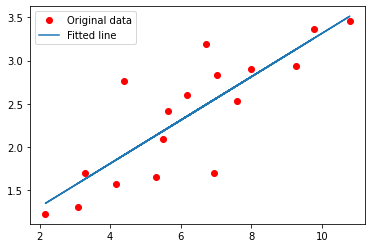

In [17]:
# Graphic display
import matplotlib.pyplot as plt
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()